In [5]:
import sys
sys.path.append('/eos/user/l/lkoller/SWAN_projects/data analysis 2024/commands')

from pathlib import Path
import pandas as pd
import numpy as np
from readTrc_4CH import Trc
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import scipy.signal as sci
import scipy.optimize as scio
from scipy.optimize import OptimizeWarning
from tqdm import tqdm
import math
from time import time
pd.set_option("display.max_columns",150)

In [9]:
df = pd.read_csv('/eos/experiment/gbar/datasummary/datafile24.txt', delimiter = '\t')
df = df[df.Date == '24_09_19']
df = df[df.run_type == 4]
fl = list(df.LyA)

corr = pd.read_csv('/eos/user/l/lkoller/SWAN_projects/data analysis 2024/LyA/correction functions/correction_arrays_ds1-2.csv').fillna(-100)

In [23]:
corr

,0,1,2,3,4,5,6,7
0,-11.000,-11.000,-11.000,-11.000,0.000000,0.0,0.0,0.0
1,-10.999,-10.999,-10.999,-10.999,0.000000,0.0,0.0,0.0
2,-10.998,-10.998,-10.998,-10.998,0.000000,0.0,0.0,0.0
3,-10.997,-10.997,-10.997,-10.997,0.000000,0.0,0.0,0.0
4,-10.996,-10.996,-10.996,-10.996,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
811996,800.996,-100.000,-100.000,-100.000,-0.000046,-100.0,-100.0,-100.0
811997,800.997,-100.000,-100.000,-100.000,-0.000046,-100.0,-100.0,-100.0
811998,800.998,-100.000,-100.000,-100.000,-0.000046,-100.0,-100.0,-100.0
811999,800.999,-100.000,-100.000,-100.000,-0.000046,-100.0,-100.0,-100.0


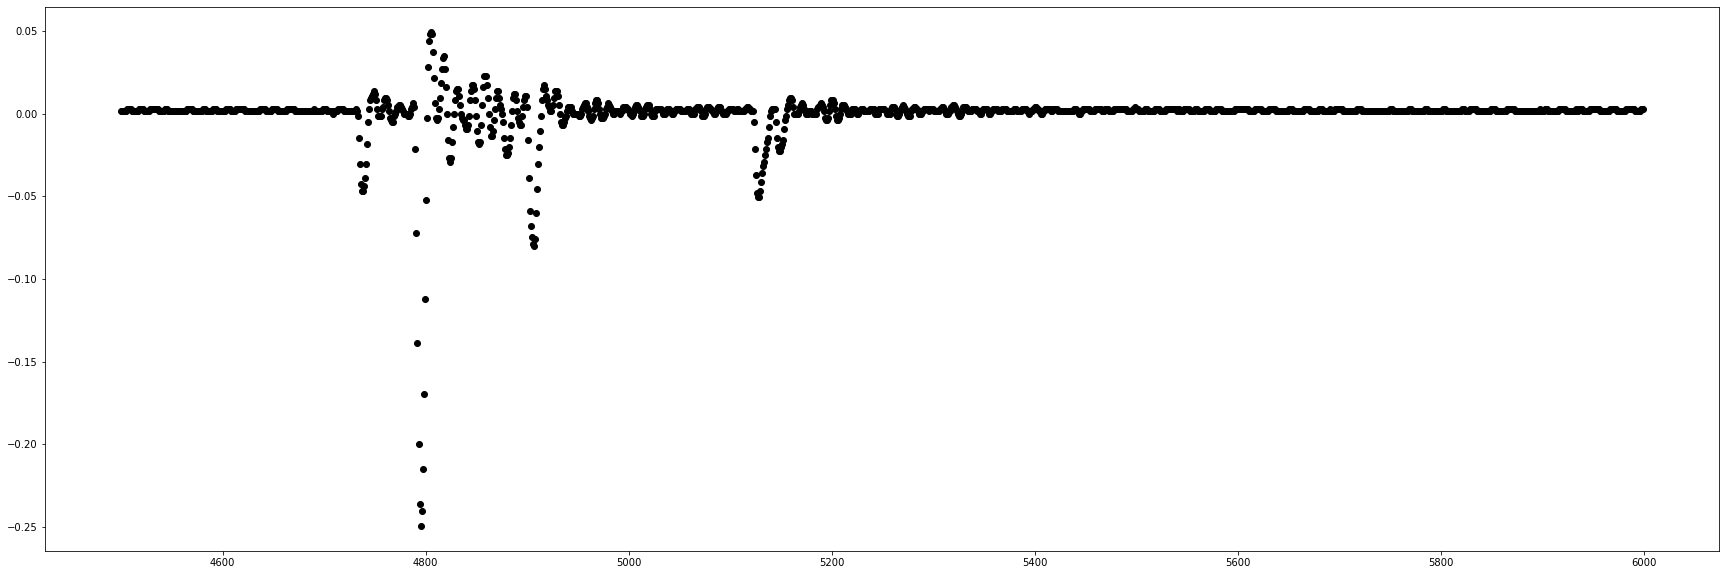

In [45]:
pos = 4
ch = 1
lims = [4500, 6000]
xl = np.linspace(0,10001,10002)

d = Trc().open(fl[pos])

plt.figure(figsize = (30,10))

plt.scatter(xl[lims[0]:lims[1]], d[1][ch][lims[0]:lims[1]], c = 'k')

#t0 = 4929
#h0 = d[1][ch][t0]
#plt.scatter(t0, h0, c = 'r')
#plt.plot(corr[str(ch)][:100000]+t0, h0*corr[str(ch+4)][:100000], c = 'r')

In [8]:
df

,Date,Time,Datetime,run_type,run,run_mode,event_number,DAQ,pbar_trap,positron,MCP1,MCP2,MCP3,MCP3.5,MCP4,MCP5,MCP7,Waveform_12bit,CMOS_Tracker,DRS4,Positron_Waveform,SD,LyA,SD_LyA,Cy_Des,NE00_I,NE50_I,NE00_Bm1,NE00_Bm2,NE00_Bm3,NE50_Bm1,NE50_Bm2,Int,Valve_in,MCP_in,MW_power,H-sou_pressure,cube_pressure,RC_pressure,MW_pressure,SwY_pressure,LyA_pressure,Main_delay,PCOs_delay,LyA_delay,Laser_delay,FC_current,MCP4_current,MCP5_current,St_dec_up,St_dec_dw,St_dec_ri,St_dec_le,St_Cub_up,St_Cub_dw,St_Cub_ri,St_Cub_le,St_RC1_up,St_RC1_dw,St_RC1_ri,St_RC1_le,St_RC2_up,St_RC2_dw,St_RC2_ri,St_RC2_le,St_RC3_up,St_RC3_dw,St_RC3_ri,St_RC3_le,St_Al1_up,St_Al1_dw,St_Al1_ri,St_Al1_le,St_Al2_up,St_Al2_dw,St_Al2_ri,St_Al2_le,QT_RC1_+,QT_RC1_-,QT_RC2_+,QT_RC2_-,QT_RC3_+,QT_RC3_-,SwY_1_+,SwY_1_-,SwY_3_+,SwY_3_-,EL_pT_in,EL_pT_1,EL_pT_2,EL_pT_3,EL_pT_4,EL_RC_in,EL_SwY_+,EL_Al1_+,EL_Al2_+,EL_Al3_+,Ly_MCP_1,Ly_MCP_2,Ly_MCP_3,Ly_MCP_4,Qnch_+,Qnch_-,TgDefl_+,H-Defl_+,H-Cor1_-,H-Cor1-,1_phos_+,1_mcp_+,2_phos_+,2_mcp_+,3_phos_+,3_mcp_+,3.5_grid_-,3.5_phos_+,3.5_mcp_+,4_phos_+,4_mcp_+,5_phos_+,5_mcp_+,6_phos_+,6_mcp_+,7_phos_+,7_mcp_+,Sci_1_-,Sci_2_-,H_offs,target_pos,front_bias,mw_amp_curr,hfs_temp,hfs_freq,hfs_pow,sc_temp,sc_freq,sc_pow,empty_1,empty_2,empty_3,empty_4,empty_5,empty_6,empty_7,empty_8
17491,24_09_19,1.726765e+09,2024-09-19 19:02:36.668000,4,714.0,NaN,1,0.0,0,0,None,None,None,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_09_19/WF12...,None,None,None,None,None,None,Hminus_Commissioning_2024,0.000,11.325,0.0,0.0,0.0,0.0,0.0,42.398,268472263.0,0.0,0.066455,1.550000e-09,8.020000e-09,8.980000e-09,1.510000e-08,6.930000e-09,3.940000e-08,0.000902,0.001004,0.00101,0.000999,3.438895e-07,0.000204,0.000086,49.95994,-49.98206,0.046081,0.031925,4.937614,-4.980651,39.97510,-39.97030,-41.98336,41.95845,-4.983608,4.978628,-59.79850,59.98106,-39.78398,39.99248,-0.027847,-0.005943,0.014312,0.024771,0.018139,0.028501,0.021775,0.019488,0.024643,0.012228,0.009421,0.013228,-92.07421,91.71504,-108.1120,107.7086,-110.0869,109.6983,1099.814,-1099.991,599.8218,-599.9705,-3200.001,-3199.999,-3199.998,-2499.998,0.500558,-1799.998,-0.075553,-0.234004,-0.158462,-0.169475,2000.003,1999.996,1999.998,1999.999,3000.002,-1999.998,-0.048980,-0.052396,-0.763885,-0.028009,-0.522738,-0.625668,-0.595016,-0.639437,-0.057618,-0.053872,0.039507,-0.055724,-0.086480,-0.124891,-0.014161,4000.007,2250.007,-0.146576,-0.151232,0.006247,-0.055335,-0.752161,-0.741825,0.000103,51.00024,0.00,9.88,50.6,1.162000e+09,-100.0,50.6,1.060000e+09,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17492,24_09_19,1.726765e+09,2024-09-19 19:02:50.926000,4,714.0,NaN,2,0.0,0,0,None,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_09_19/PCO-...,None,/eos/experiment/gbar/pgunpc/data/24_09_19/WF12...,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_09_19/24_0...,None,Hminus_Commissioning_2024,0.000,9.892,0.0,0.0,0.0,0.0,0.0,42.129,268472263.0,0.0,0.066432,1.550000e-09,7.980000e-09,8.920000e-09,1.510000e-08,6.910000e-09,3.930000e-08,0.000902,0.001004,0.00101,0.000999,3.626336e-07,0.000204,0.000086,49.96073,-49.98192,0.046387,0.031870,4.937848,-4.980772,39.97492,-39.97018,-41.98315,41.95869,-4.983800,4.979060,-59.80062,59.98097,-39.78533,39.99301,0.000897,0.027238,0.008411,0.019611,0.017392,0.028003,0.022024,0.020235,0.024643,0.011481,0.008674,0.010989,-92.07349,91.71535,-108.1117,107.7083,-110.0859,109.6977,1099.812,-1099.990,599.8221,-599.9695,-3199.994,-3199.997,-3200.003,-2500.002,0.542591,-1800.001,-0.075553,-0.234004,-0.156000,-0.169475,2000.001,1999.996,1999.999,1999.998,3000.002,-1999.999,-0.034231,-0.042502,-0.763885,-0.027596,-0.522738,-0.605906,-0.602426,-0.639437,-0.063542,-0.059804,0.054339,-0.066098,-0.086480,-0.127857,-0.014161,3999.998,2250.008,-0.149546,-0.149254,-0.003631,-0.030631,-0.752161,-0.741825,0.000103,51.00024,-0.01,9.87,50.6,1.162000e+09,-100.0,50.6,1.060000e+09,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17493,24_09_19,1.726765e+09,2024-09-19 19:03:04.985000,4,714.0,NaN,3,0.0,0,0